In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic  (или в других источниках) предположительно зависимые данные (например: «доля людей в возрасте 70+» и «приверженность жителей тех к ЗОЖ» по регионам), посчитать коэффициент корреляции, оценить меру связи.
Построить гистограммы рассеяния, линию аппроксимации  и посчитать величину достоверности аппроксимации R^2.


Датасет: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

In [3]:
# Загрузка данных
data = pd.read_csv('Salary_Data.csv')

# Предположим, что у вас есть два столбца: 'X' и 'Y'
x = data['YearsExperience']
y = data['Salary']

# Расчёт коэффициента корреляции
corr_coef, p_value = pearsonr(x, y)
print(f"Коэффициент корреляции: {corr_coef:.4f}")
print(f"P-значение: {p_value:.4f}")

Коэффициент корреляции: 0.9782
P-значение: 0.0000


-	Коэффициент корреляции 0.9782 показывает, что между зарплатой и количеством лет опыта существует очень сильная положительная связь. Это означает, что с увеличением опыта, как правило, увеличивается и зарплата.
-	p-значение, равное 0.00, говорит о том, что вероятность случайного получения такой сильной корреляции практически равна нулю (при условии, что связь между переменными отсутствует). Так как p-значение меньше 0.05, мы можем отвергнуть нулевую гипотезу и принять, что между зарплатой и опытом существует статистически значимая связь.

In [4]:
# Линейная регрессия
x_reshaped = x.values.reshape(-1, 1)  # преобразуем в двумерный массив для модели
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

# Расчёт R^2
r2 = r2_score(y, y_pred)
print(f"Величина достоверности аппроксимации (R^2): {r2:.4f}")

Величина достоверности аппроксимации (R^2): 0.9570


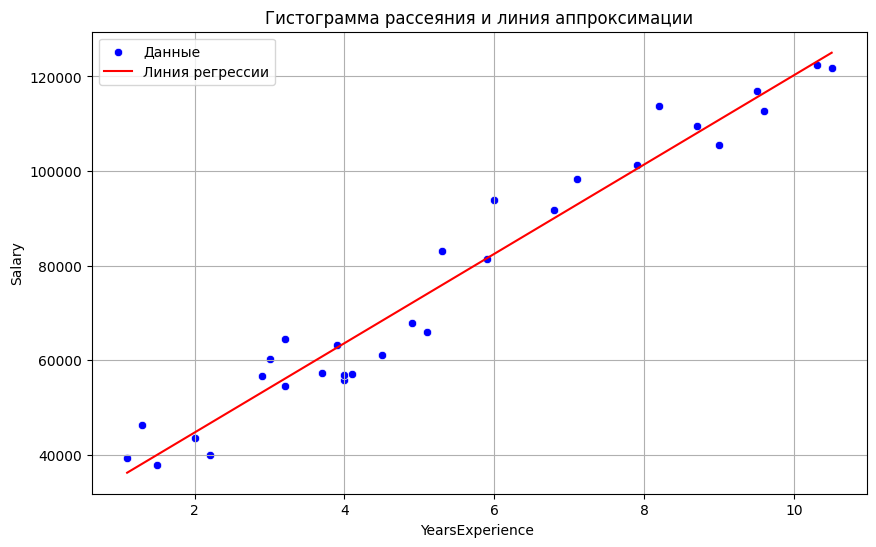

In [7]:
# Визуализация данных и линии регрессии
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Данные')
plt.plot(x, y_pred, color='red', label='Линия регрессии')
plt.title('Гистограмма рассеяния и линия аппроксимации')
plt.xlabel('YearsExperience ')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

2.	Найти датасет с объемом ~100 наблюдений (и более), сделать выборку =~ 1/3 наблюдений 
    1) случайным образом, 
    2) сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию, например, для регионов стратами могут быть федеральные округа). 


In [13]:
# Загрузка данных
data = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')


# Случайная выборка (примерно 1/3 данных)
random_sample = data.sample(frac=1/3, random_state=42)
print("Случайная выборка")
random_sample.head()


Случайная выборка


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
75721,75722,Sales,Other,31,Manager,2024-03-23 08:03:05.556036,0,Master,2,7200.0,60,18,24,8,75,5,9,0,4.59,False
80184,80185,Sales,Male,50,Engineer,2024-09-02 08:03:05.556036,0,High School,4,8400.0,44,19,5,12,0,13,90,1,4.83,False
19864,19865,Sales,Female,29,Manager,2015-09-28 08:03:05.556036,8,High School,3,7800.0,33,18,19,5,75,16,53,0,2.23,True
76699,76700,Marketing,Female,24,Analyst,2022-08-13 08:03:05.556036,2,Master,1,4400.0,33,35,26,0,0,18,68,0,4.88,True
92991,92992,Operations,Male,40,Technician,2015-02-10 08:03:05.556036,9,Bachelor,4,4900.0,37,1,21,7,0,1,88,1,3.68,False


In [15]:
# Стратифицированная выборка по колонке 'Department'
stratified_sample = data.groupby('Department', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))
print("Стратифицированная выборка")
stratified_sample.head()

Стратифицированная выборка


/var/folders/49/pg71k7ds153_bhdvy_nz9fdhj6sww6/T/ipykernel_2750/1132875240.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('Department', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
16584,16585,Customer Support,Male,44,Analyst,2018-05-20 08:03:05.556036,6,High School,3,5200.0,44,41,23,6,50,4,42,2,4.06,False
30036,30037,Customer Support,Female,31,Engineer,2023-02-23 08:03:05.556036,1,Master,2,7200.0,34,15,11,8,50,11,45,2,4.91,False
45467,45468,Customer Support,Female,37,Analyst,2020-04-21 08:03:05.556036,4,Bachelor,1,4400.0,34,47,28,7,25,4,0,1,2.88,False
78161,78162,Customer Support,Male,30,Consultant,2023-02-25 08:03:05.556036,1,Bachelor,3,7150.0,31,4,12,2,75,14,54,1,1.18,False
67799,67800,Customer Support,Male,26,Consultant,2023-07-14 08:03:05.556036,1,Bachelor,3,7150.0,51,12,8,0,75,11,97,0,3.50,False




 3.	Посчитать 
     1) среднее значение по выборкам из п.2 (2.1)случайной и 2.2)стратифицированной), 
    2) доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
  Сравнить среднее генеральной выборки п.2  с полученными в выборках 2.1) и 2.2)  и с границами доверительных интервалов из п.3.2).
 

In [20]:
# Расчет среднего значения по выборкам
mean_population = data['Performance_Score'].mean()
mean_random = random_sample['Performance_Score'].mean()
mean_stratified = stratified_sample['Performance_Score'].mean()

print(f"Среднее значение (генеральная совокупность): {mean_population:.2f}")
print(f"Среднее значение (случайная выборка): {mean_random:.2f}")
print(f"Среднее значение (стратифицированная выборка): {mean_stratified:.2f}")

# Доверительные интервалы (90%, 95%, 99%)
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - margin, mean + margin

# Доверительные интервалы для случайной выборки
ci_90_random = confidence_interval(random_sample['Performance_Score'], confidence=0.90)
ci_95_random = confidence_interval(random_sample['Performance_Score'], confidence=0.95)
ci_99_random = confidence_interval(random_sample['Performance_Score'], confidence=0.99)

# Доверительные интервалы для стратифицированной выборки
ci_90_stratified = confidence_interval(stratified_sample['Performance_Score'], confidence=0.90)
ci_95_stratified = confidence_interval(stratified_sample['Performance_Score'], confidence=0.95)
ci_99_stratified = confidence_interval(stratified_sample['Performance_Score'], confidence=0.99)

print(f"\nДоверительный интервал (90%) - случайная выборка: {ci_90_random}")
print(f"Доверительный интервал (95%) - случайная выборка: {ci_95_random}")
print(f"Доверительный интервал (99%) - случайная выборка: {ci_99_random}")

print(f"\nДоверительный интервал (90%) - стратифицированная выборка: {ci_90_stratified}")
print(f"Доверительный интервал (95%) - стратифицированная выборка: {ci_95_stratified}")
print(f"Доверительный интервал (99%) - стратифицированная выборка: {ci_99_stratified}")

Среднее значение (генеральная совокупность): 3.00
Среднее значение (случайная выборка): 2.99
Среднее значение (стратифицированная выборка): 3.00

Доверительный интервал (90%) - случайная выборка: (2.9806728250613044, 3.006127042937375)
Доверительный интервал (95%) - случайная выборка: (2.978234519116534, 3.0085653488821458)
Доверительный интервал (99%) - случайная выборка: (2.973468782790405, 3.0133310852082746)

Доверительный интервал (90%) - стратифицированная выборка: (2.9871653832965097, 3.012714611903298)
Доверительный интервал (95%) - стратифицированная выборка: (2.9847179760967055, 3.0151620191031023)
Доверительный интервал (99%) - стратифицированная выборка: (2.979934451110002, 3.019945544089806)
